In [1]:
import pandas as pd
import numpy as np
from scipy.stats import genextreme, genpareto
import matplotlib.pyplot as plt



In [2]:
# Carga el archivo Excel (reemplaza 'tus_datos.xlsx' por tu archivo)
from google.colab import files
uploaded = files.upload()  # Esto abrirá un cuadro para subir tu archivo Excel

ModuleNotFoundError: No module named 'google'

In [3]:
# Lee el archivo Excel en un DataFrame
import os
url= os.path.join(os.getcwd(), "data", "Datos_Clima.xlsx")
data= pd.read_excel(url)  # Asegúrate de que el nombre sea correcto

In [9]:
data

,Max_Temp_Yearly,Excess_Temp,Precipitation_Extreme,Winds_Extreme
0,36.216065,2.569029,49.498246,38.124987
1,41.242986,0.974734,37.942590,36.373839
2,36.153893,4.192209,54.698490,43.077956
3,39.247333,1.533917,35.134502,35.426416
4,30.128572,2.801465,36.861812,38.153053
...,...,...,...,...
9995,41.790190,0.523818,34.840783,38.723195
9996,44.514411,10.811594,37.761998,37.784552
9997,40.635052,1.995160,32.221248,68.728313
9998,32.795049,2.873113,41.829440,38.043547


Parámetros estimados para la distribución GEV (Max_Temp_Yearly):
μ (loc): 35.08372147186361
σ (scale): 4.958965659146124
ξ (shape): -0.0007075909846222645

Parámetros estimados para la distribución GPD (Excess_Temp):
σ (scale): 0.000421827823926642
ξ (shape): 0.486882459463876


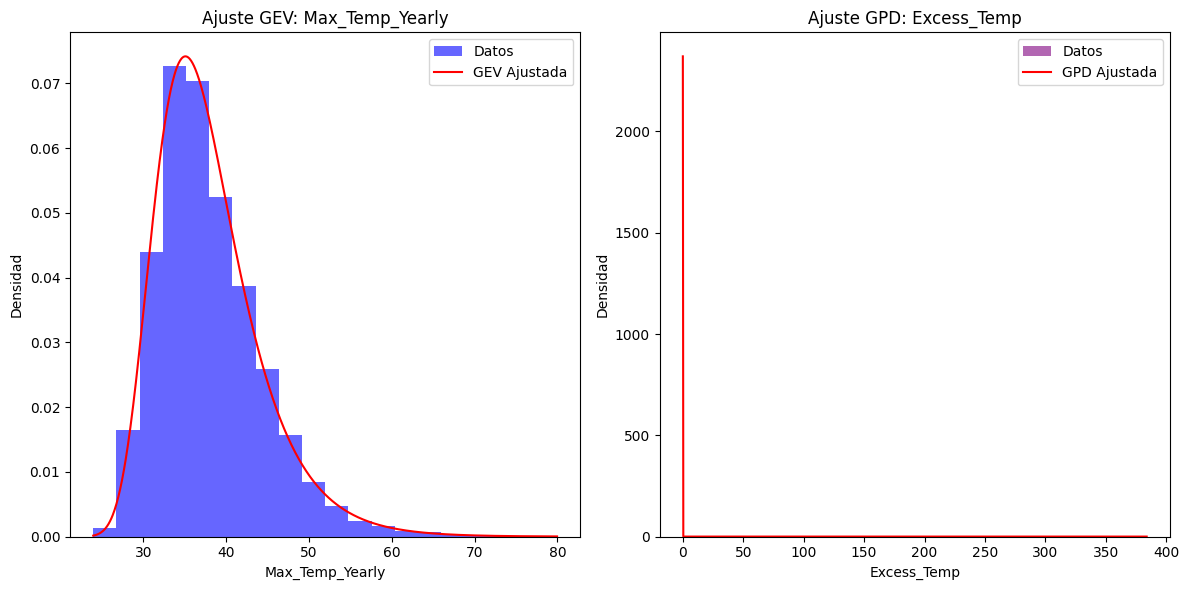

In [5]:

# Ajustar la distribución GEV a Max_Temp_Yearly
gev_params_temp = genextreme.fit(data['Max_Temp_Yearly'])
gev_mu_temp = gev_params_temp[1]
gev_sigma_temp = gev_params_temp[2]
gev_xi_temp = -gev_params_temp[0]

# Ajustar la distribución GPD a Excess_Temp
gpd_params_temp = genpareto.fit(data['Excess_Temp'], loc=0)
gpd_sigma_temp = gpd_params_temp[1]
gpd_xi_temp = gpd_params_temp[0]

# Resultados
print("Parámetros estimados para la distribución GEV (Max_Temp_Yearly):")
print(f"\u03bc (loc): {gev_mu_temp}")
print(f"\u03c3 (scale): {gev_sigma_temp}")
print(f"\u03be (shape): {gev_xi_temp}")

print("\nParámetros estimados para la distribución GPD (Excess_Temp):")
print(f"\u03c3 (scale): {gpd_sigma_temp}")
print(f"\u03be (shape): {gpd_xi_temp}")

# Visualización de los ajustes
x_temp = np.linspace(data['Max_Temp_Yearly'].min(), data['Max_Temp_Yearly'].max(), 1000)
pdf_gev_temp = genextreme.pdf(x_temp, -gev_params_temp[0], loc=gev_params_temp[1], scale=gev_params_temp[2])

x_excess = np.linspace(0, data['Excess_Temp'].max(), 1000)
pdf_gpd_temp = genpareto.pdf(x_excess, gpd_params_temp[0], loc=0, scale=gpd_params_temp[1])

plt.figure(figsize=(12, 6))

# Gráfico para GEV
plt.subplot(1, 2, 1)
plt.hist(data['Max_Temp_Yearly'], bins=20, density=True, alpha=0.6, color='blue', label='Datos')
plt.plot(x_temp, pdf_gev_temp, 'r-', label='GEV Ajustada')
plt.title('Ajuste GEV: Max_Temp_Yearly')
plt.xlabel('Max_Temp_Yearly')
plt.ylabel('Densidad')
plt.legend()

# Gráfico para GPD
plt.subplot(1, 2, 2)
plt.hist(data['Excess_Temp'], bins=20, density=True, alpha=0.6, color='purple', label='Datos')
plt.plot(x_excess, pdf_gpd_temp, 'r-', label='GPD Ajustada')
plt.title('Ajuste GPD: Excess_Temp')
plt.xlabel('Excess_Temp')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()


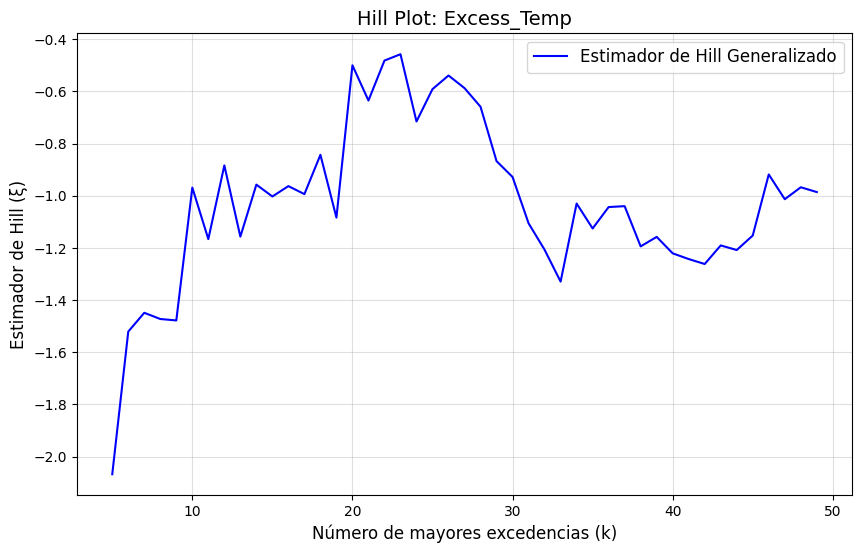

Estimador de Hill Generalizado para k=20: ξ = -0.49987769271605964


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular el Estimador de Hill Generalizado
def hill_generalized(data, k):
    sorted_data = np.sort(data)[::-1]  # Ordenar en orden descendente
    excess_k = sorted_data[:k] - sorted_data[k]  # Excedencias sobre el umbral
    hill_estimate = np.mean(np.log(excess_k / sorted_data[k]))
    return hill_estimate

# Cálculo para diferentes valores de k
k_values = range(5, 50)  # Número de mayores excedencias consideradas
hill_excess_temp = [hill_generalized(data['Excess_Temp'], k) for k in k_values]

# Gráfico de Hill Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, hill_excess_temp, label='Estimador de Hill Generalizado', color='blue')
plt.xlabel('Número de mayores excedencias (k)', fontsize=12)
plt.ylabel('Estimador de Hill (ξ)', fontsize=12)
plt.title('Hill Plot: Excess_Temp', fontsize=14)
plt.grid(alpha=0.4)
plt.legend(fontsize=12)
plt.show()

# Estimador para un k representativo
k_representative = 20
hill_excess_temp_val = hill_generalized(data['Excess_Temp'], k_representative)

print(f"Estimador de Hill Generalizado para k={k_representative}: ξ = {hill_excess_temp_val}")


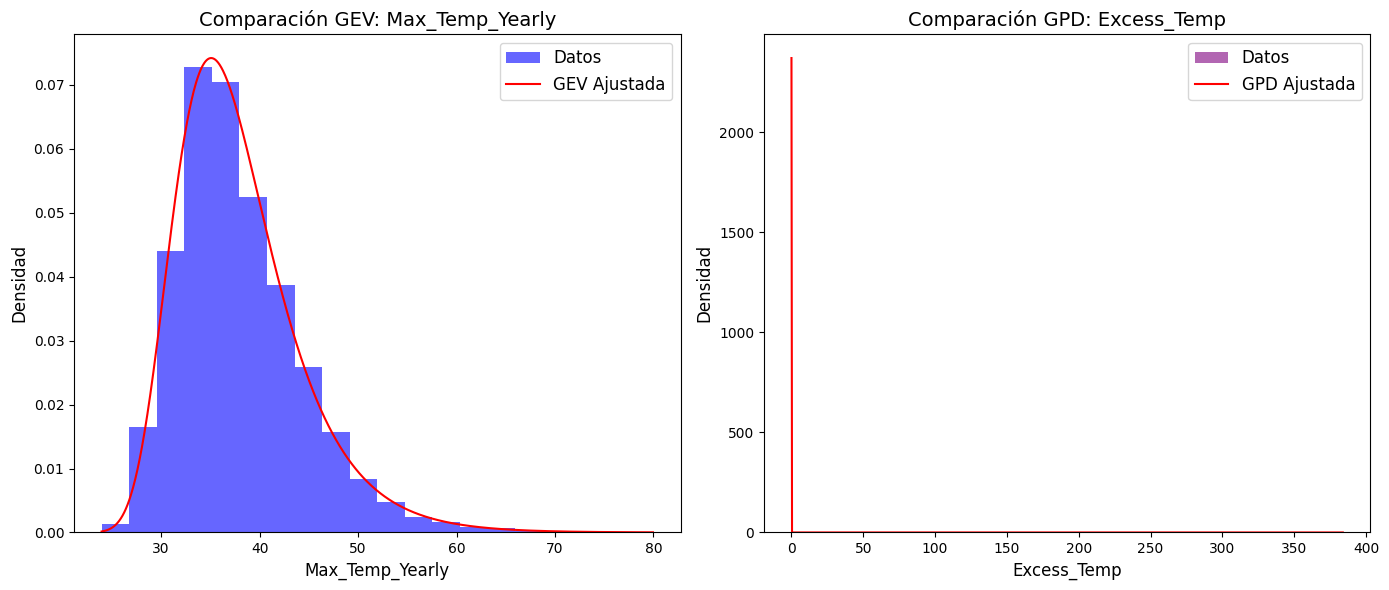

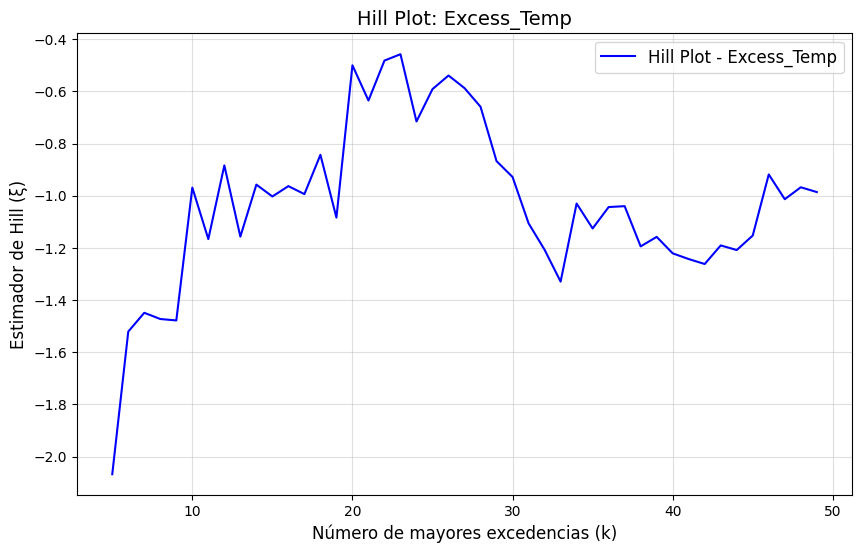

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme, genpareto

# Visualización de GEV y GPD con los datos observados
x_temp = np.linspace(data['Max_Temp_Yearly'].min(), data['Max_Temp_Yearly'].max(), 1000)
pdf_gev_temp = genextreme.pdf(x_temp, -gev_params_temp[0], loc=gev_params_temp[1], scale=gev_params_temp[2])

x_excess = np.linspace(0, data['Excess_Temp'].max(), 1000)
pdf_gpd_temp = genpareto.pdf(x_excess, gpd_params_temp[0], loc=0, scale=gpd_params_temp[1])

plt.figure(figsize=(14, 6))

# Comparación de datos observados con GEV
plt.subplot(1, 2, 1)
plt.hist(data['Max_Temp_Yearly'], bins=20, density=True, alpha=0.6, color='blue', label='Datos')
plt.plot(x_temp, pdf_gev_temp, 'r-', label='GEV Ajustada')
plt.title('Comparación GEV: Max_Temp_Yearly', fontsize=14)
plt.xlabel('Max_Temp_Yearly', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(fontsize=12)

# Comparación de datos observados con GPD
plt.subplot(1, 2, 2)
plt.hist(data['Excess_Temp'], bins=20, density=True, alpha=0.6, color='purple', label='Datos')
plt.plot(x_excess, pdf_gpd_temp, 'r-', label='GPD Ajustada')
plt.title('Comparación GPD: Excess_Temp', fontsize=14)
plt.xlabel('Excess_Temp', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

# Hill Plot para mostrar la estabilidad del estimador
def hill_generalized(data, k):
    sorted_data = np.sort(data)[::-1]  # Ordenar en orden descendente
    excess_k = sorted_data[:k] - sorted_data[k]  # Excedencias sobre el umbral
    hill_estimate = np.mean(np.log(excess_k / sorted_data[k]))
    return hill_estimate

k_values = range(5, 50)
hill_excess_temp = [hill_generalized(data['Excess_Temp'], k) for k in k_values]

plt.figure(figsize=(10, 6))
plt.plot(k_values, hill_excess_temp, label='Hill Plot - Excess_Temp', color='blue')
plt.xlabel('Número de mayores excedencias (k)', fontsize=12)
plt.ylabel('Estimador de Hill (ξ)', fontsize=12)
plt.title('Hill Plot: Excess_Temp', fontsize=14)
plt.grid(alpha=0.4)
plt.legend(fontsize=12)
plt.show()


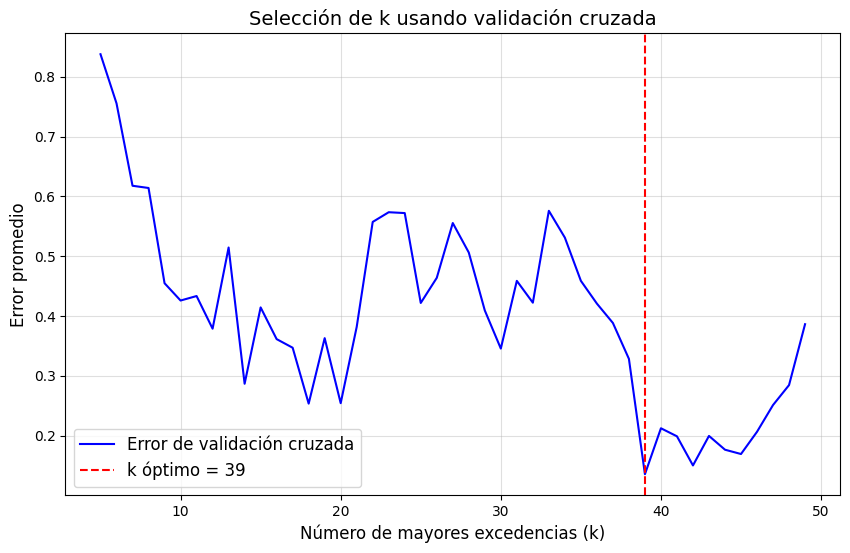

El valor óptimo de k es: 39


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Función para calcular el Estimador de Hill
def hill_estimator(data, k):
    sorted_data = np.sort(data)[::-1]  # Ordenar en orden descendente
    excess_k = sorted_data[:k] - sorted_data[k]  # Excedencias sobre el umbral
    hill = np.mean(np.log(excess_k / sorted_data[k]))
    return hill

# Validación cruzada para elegir k
def cross_validate_hill(data, k_values, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    errors = []

    for k in k_values:
        fold_errors = []
        for train_index, test_index in kf.split(data):
            train_data = data[train_index]
            test_data = data[test_index]

            try:
                hill = hill_estimator(train_data, k)
                sorted_test = np.sort(test_data)[::-1]
                test_k = sorted_test[:k] - sorted_test[k]  # Excedencias en test
                if len(test_k) > 0:
                    predicted = np.mean(np.log(test_k / sorted_test[k]))
                    fold_errors.append(abs(hill - predicted))
            except:
                fold_errors.append(np.nan)  # Para manejar posibles errores numéricos

        errors.append(np.nanmean(fold_errors))  # Promedio de errores por k

    return errors

# Cargar la base de datos desde archivo
#file_path = '/mnt/data/Datos_Clima.xlsx'
#data = pd.read_excel(file_path, sheet_name='Base')

# Datos de ejemplo (usando Excess_Temp)
excess_temp_data = np.array(data['Excess_Temp'])

# Valores de k para probar
k_values = range(5, 50)

# Validación cruzada
cv_errors = cross_validate_hill(excess_temp_data, k_values)

# Encontrar el k óptimo
optimal_k = k_values[np.nanargmin(cv_errors)]

# Gráfico de los errores
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_errors, label='Error de validación cruzada', color='blue')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'k óptimo = {optimal_k}')
plt.xlabel('Número de mayores excedencias (k)', fontsize=12)
plt.ylabel('Error promedio', fontsize=12)
plt.title('Selección de k usando validación cruzada', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()

print(f"El valor óptimo de k es: {optimal_k}")
